# formalities

In [1]:
from train_dualencoder_cardiac import create_data_loaders, build_model
from pathlib import Path
from skimage import measure
from data.transforms import ifft2,fft2, complex_abs
from tqdm import tqdm
from collections import namedtuple
import torch

In [2]:
args = {'center_fractions':[0.08],'accelerations':[4],'challenge':'singlecoil',
       'data_path':Path('/media/student1/NewVolume/MR_Reconstruction/datasets/fastmri/'),
       'resolution':320,
       'sample_rate':0.1,
       'batch_size':10,
        'device':'cuda',
        'data_parallel':False,
        'num_chans':32,
        'num_pools':4,
        'drop_prob':0
       }
# d_named = namedtuple("Employee", d.keys())(*d.values())
argsobj = namedtuple('args',args.keys())(*args.values())

# dataloading

In [3]:

import h5py
import numpy as np
from matplotlib import pyplot as plt

In [4]:
file = '/media/student1/NewVolume/MR_Reconstruction/experiments/fastmri/acc_4x/fastmri_dualencoder/results/file1000831.h5'
hf_dual = h5py.File(file)

/home/student1/anaconda3/envs/fastmri/lib/python3.6/site-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


OSError: Unable to create file (unable to open file: name = '/media/student1/NewVolume/MR_Reconstruction/experiments/fastmri/acc_4x/fastmri_dualencoder/results/file1000831.h5', errno = 2, error message = 'No such file or directory', flags = 15, o_flags = c2)

In [5]:
file = '/media/student1/NewVolume/MR_Reconstruction/datasets/fastmri/singlecoil_train/file1002093.h5'
hf_unet = h5py.File(file)

/home/student1/anaconda3/envs/fastmri/lib/python3.6/site-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


In [6]:

print('Keys:', list(hf_unet.keys()))
print('Attrs:', dict(hf_unet.attrs))

Keys: ['ismrmrd_header', 'kspace', 'reconstruction_esc', 'reconstruction_rss']
Attrs: {'acquisition': 'CORPDFS_FBK', 'max': 0.0003044338237407161, 'norm': 0.0924086636495778, 'patient_id': '014741596e1eca1215f6b6cc3fa82bcd0b73d52b617a876faddd99d4ac4cfd78'}


In [7]:
# print('Keys:', list(hf_val.keys()))
# print('Attrs:', dict(hf_val.attrs))

In [9]:
volume_image_unet = hf_unet['reconstruction_esc'][()]

In [130]:
volume_image_dual = hf_dual['reconstruction'][()]

In [131]:
volume_image_val = hf_val['reconstruction_rss'][()]

In [132]:
volume_image_val.shape

(38, 320, 320)

In [13]:
idx=25

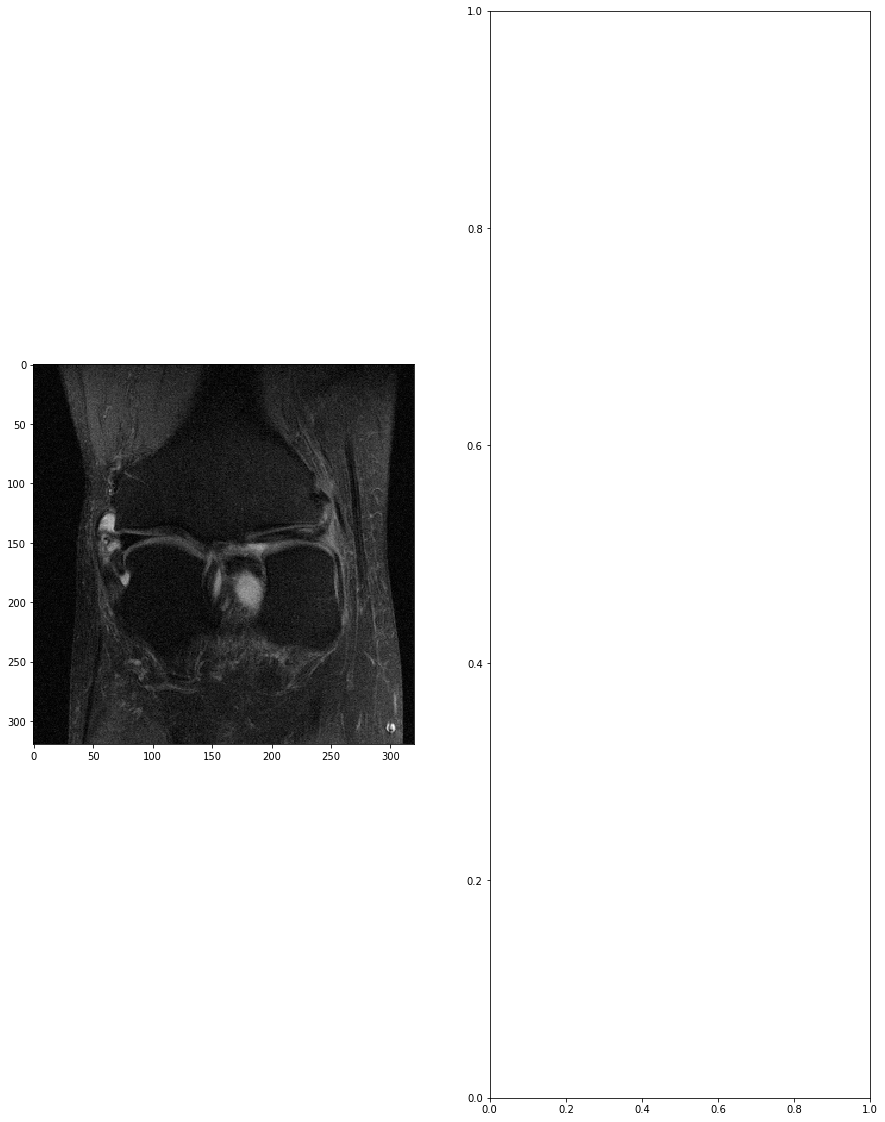

In [14]:
fig, ax = plt.subplots(1,2,figsize = (15, 20))
ax[0].imshow(volume_image_unet[idx,:,:],cmap='gray');
# ax[1].imshow(volume_image_dual[idx,:,:],cmap='gray');


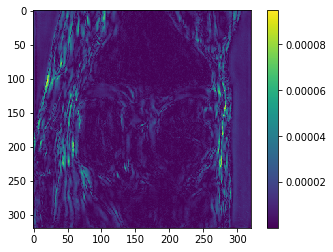

In [174]:
error = abs( volume_image_dual - volume_image_unet)
plt.imshow(error[idx,:,:])
plt.colorbar()

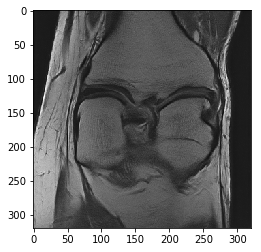

In [175]:
plt.imshow(volume_image_dual[idx,:,:],cmap='gray')

In [176]:
error_dual = abs( volume_image_dual - volume_image_val)
error_unet = abs(volume_image_unet - volume_image_val)

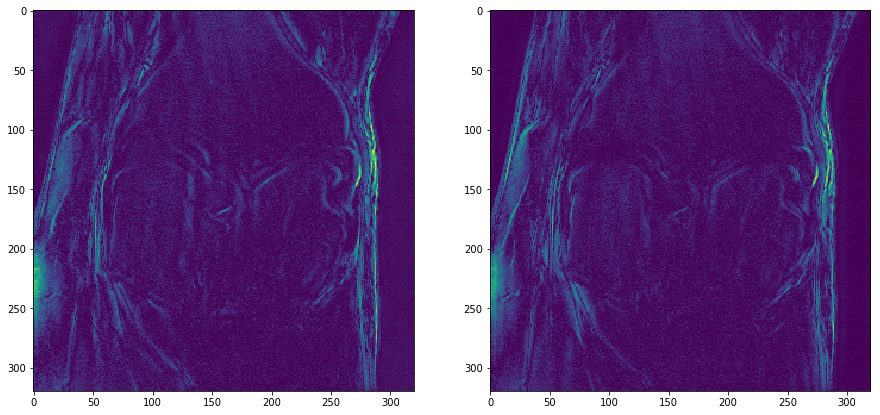

In [177]:
fig, ax = plt.subplots(1,2,figsize = (15, 20))
ax[0].imshow(error_unet[idx,:,:]);
ax[1].imshow(error_dual[idx,:,:]);

# 

In [ ]:
plt.imshow(tgt[idx],cmap='gray')

# unet

In [ ]:
from train_unet import build_model

In [ ]:
CHECKPOINT='/media/student1/NewVolume/MR_Reconstruction/experiments/fastmri/acc_2x/fastmri_unet/best_model.pt'
checkpoint = torch.load(CHECKPOINT)

In [ ]:
args = checkpoint['args']

model = build_model(args)


model.load_state_dict(checkpoint['model'])

In [ ]:
model_unet = model.cpu()
out_unet= model_unet(inp.unsqueeze(1))

In [ ]:
plt.imshow(out_unet[idx,0,:,:].detach().cpu(),cmap='gray')

# dualencoder

In [ ]:
model_unet = model.cpu()
from train_dualencoder import build_model


In [ ]:
CHECKPOINT='/media/student1/NewVolume/MR_Reconstruction/experiments/fastmri/acc_2x/fastmri_dualencoder/best_model.pt'
checkpoint = torch.load(CHECKPOINT)

In [ ]:
args = checkpoint['args']

model = build_model(args)


model.load_state_dict(checkpoint['model'])

In [ ]:
model_dual = model.cpu()
out_dual,_= model_dual(ksp,inp.unsqueeze(1))

In [ ]:
out_dual.shape

In [ ]:
plt.imshow(out_dual[idx,0,:,:].detach(),cmap='gray')

In [ ]:
idx=3




In [ ]:
fig, ax = plt.subplots(1,2,figsize = (15, 10))
ax[0].imshow(out_unet[idx,0,:,:].detach(),cmap='gray');
ax[1].imshow(out_dual[idx,0,:,:].detach(),cmap='gray');


In [ ]:
plt.imshow(tgt[idx],cmap='gray');